In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
path = 'C:\RisheePythonExamples\election-context-2018.csv'
data = pd.read_csv(path)
#data

In [3]:
def pres_winner_2016(row):
    return 1 if row['clinton16']>row['trump16'] else 0

In [4]:
data['Pres_Winner_16'] = data.apply(lambda row: pres_winner_2016(row), axis=1)
data = data.drop(['demgov16','repgov16','othergov16'], axis = 1)
#data

In [8]:
from sklearn import tree
classifr = tree.DecisionTreeClassifier()
trainingSet = data.iloc[:,20:]
trainingSet = trainingSet.dropna()
x = trainingSet.iloc[:,:-1]
y = trainingSet.iloc[:,-1:]
x_train,  x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.5, random_state = 25)
classifr = classifr.fit(x_train,y_train)
classifr.score(x_test, y_test)
#classifr


0.8978149100257069

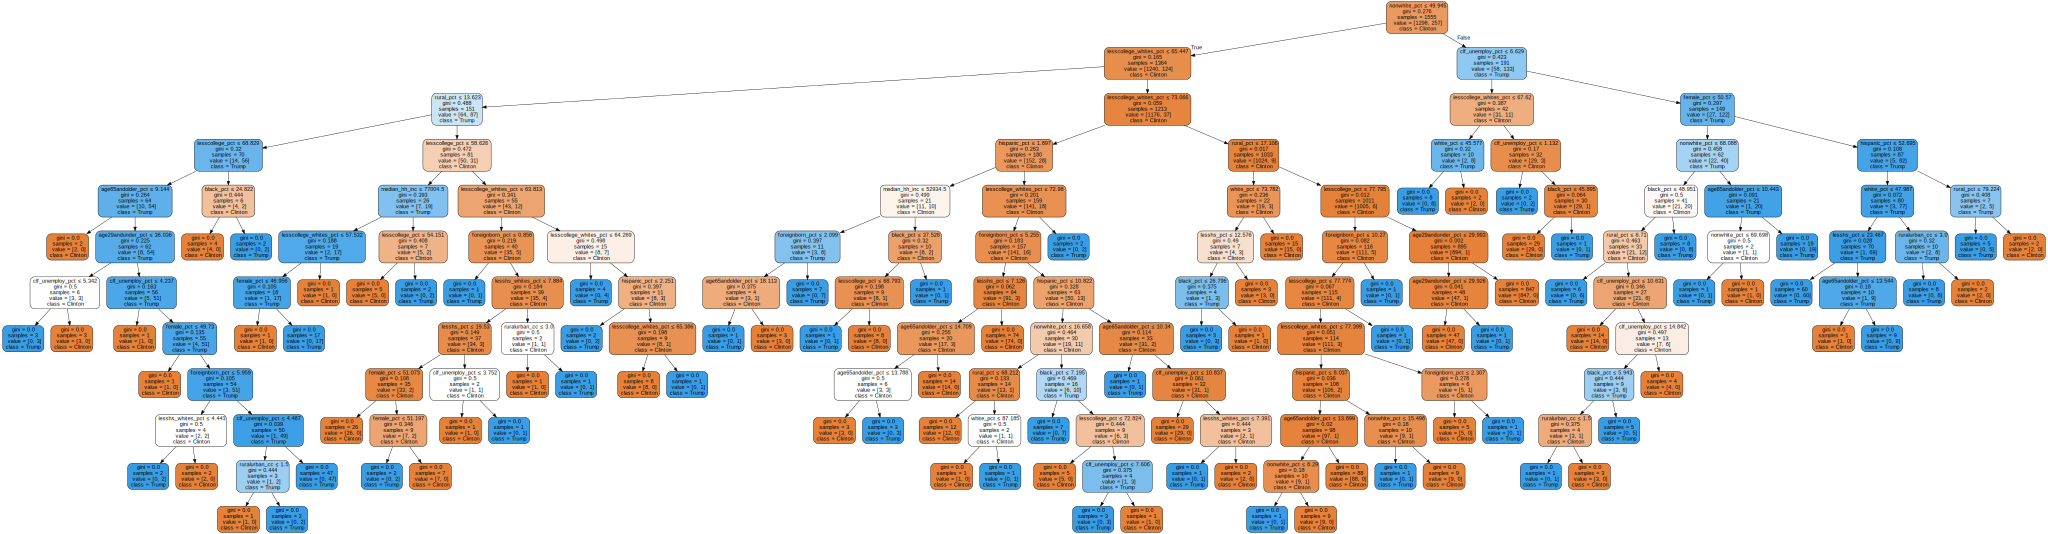

In [9]:
import graphviz
dot_data = tree.export_graphviz(classifr, out_file = None, feature_names = trainingSet.columns[:-1], class_names = ['Clinton', 'Trump'], filled = True, rounded = True, special_characters= True)
graph = graphviz.Source(dot_data)
graph.render("Election_DecTree",format = 'png')
graph

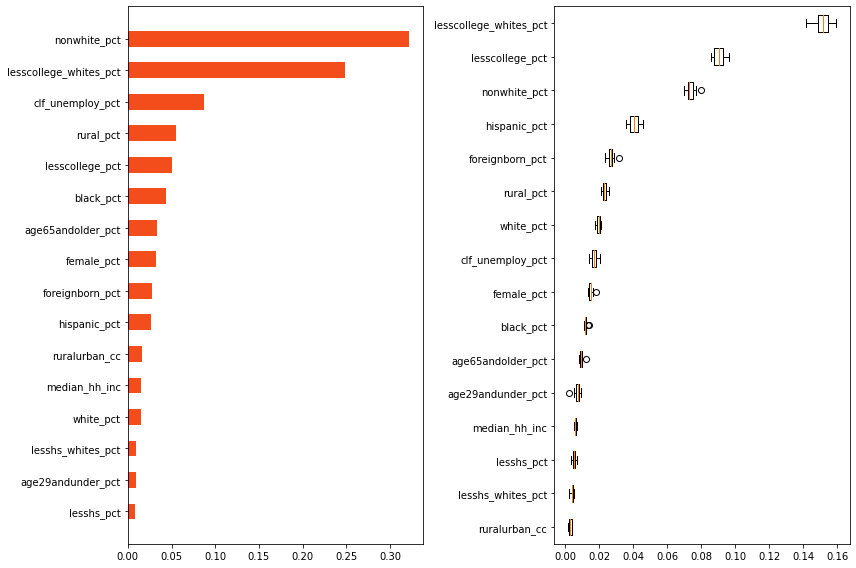

In [10]:
from sklearn.inspection import permutation_importance
decTree_permImpor_res = permutation_importance(classifr, x,y, n_repeats = 10, random_state=0)

permImpor_sort_idx = decTree_permImpor_res.importances_mean.argsort()
tree_Impor_Sorted_idx = np.argsort(classifr.feature_importances_)
tree_Indices = np.arange(0,len(classifr.feature_importances_)) + 0.5

feat_labels = trainingSet.columns[:-1]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8))
ax1.barh(tree_Indices, classifr.feature_importances_[tree_Impor_Sorted_idx], height = 0.5,color = (0.95,0.3,0.1))
ax1.set_yticklabels(feat_labels[tree_Impor_Sorted_idx])
ax1.set_yticks(tree_Indices)

ax2.boxplot(decTree_permImpor_res.importances[permImpor_sort_idx].T, vert = False, labels = feat_labels[permImpor_sort_idx])
fig.tight_layout()
plt.show()

#decTree_Res = np.transpose(np.sort(np.reshape(
#    np.append(trainingSet.columns[:-1],
#        np.append(decTree_permImpor_res.importances_mean*100,decTree_permImpor_res.importances_std*100)),
#    (3,np.size(decTree_permImpor_res.importances_mean))),axis=1))
#decTree_Res


In [82]:
path = 'C:\RisheePythonExamples\election-context-2018.csv'
data = pd.read_csv(path)
index_drops = data[(np.isnan(data['demsen16']) | np.isnan(data['demhouse16']))].index
data = data.drop(index_drops, axis = 0)
data = data.drop(['demgov16','repgov16','othergov16'], axis = 1)

def affiliation2016(row):
    retVal = 0
    if row['clinton16'] > row['trump16']:
        retVal = retVal + 1
    if row['demsen16'] > row['repsen16']:
        retVal = retVal + 10
    if row['demhouse16'] > row['rephouse16']:
        retVal = retVal + 100    

    retVal2 = 0
    if retVal == 0:
        retVal2 = 0
    if retVal == 1:
        retVal2 = 1
    if retVal == 10:
        retVal2 = 2
    if retVal == 11:
        retVal2 = 3
    if retVal == 100:
        retVal2 = 4
    if retVal == 101:
        retVal2 = 5
    if retVal == 110:
        retVal2 = 6
    if retVal == 111:
        retVal2 = 7                    
    return retVal2

data['Affiliation2016'] = data.apply(lambda row: affiliation2016(row), axis=1)

#data

In [88]:
trainingSet = data.iloc[:,20:]
trainingSet = trainingSet.dropna()
x = trainingSet.iloc[:,:-1]
y = trainingSet.iloc[:,-1:]
n_samples, n_features = x.shape
n_neighbors = 30

In [73]:
from sklearn import manifold

classifr_MDS = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds = classifr_MDS.fit_transform(x)

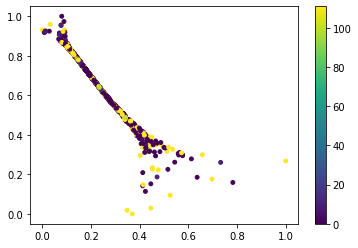

In [74]:
x_min, x_max = np.min(X_mds, 0), np.max(X_mds, 0)
X_mds_Norm = (X_mds - x_min) / (x_max - x_min)
plt.figure()
plt.scatter(X_mds_Norm[:, 0], X_mds_Norm[:, 1], 15,np.array(y))
plt.colorbar()

In [89]:
from sklearn import manifold


tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(x)

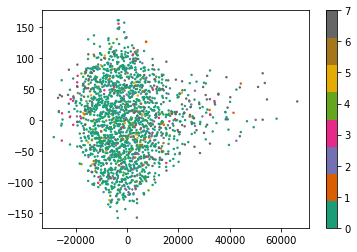

In [92]:
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 2,np.array(y), cmap = "Dark2")
plt.colorbar()